In [ ]:
# Import necessary libraries for data manipulation and visualization.
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches
import pandas as pd
import cartopy.crs as ccrs
from cartopy.io.img_tiles import Stamen

In [ ]:
# Iterating over datasets or parameters to compute or map results systematically.
import os

root_dir = '/kaggle/input/merged-class-files'  # Adjust this path if needed

fits_files = []

for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith(".fits"):  # Check if file has a .fits extension
            file_path = os.path.join(subdir, file)
            fits_files.append(file_path)


In [ ]:
# Convert data into structured DataFrame format for easier manipulation and analysis.
coordinates_data = []


for file_path in fits_files:
    with fits.open(file_path) as hdul:
        header = hdul[1].header

        v0_lat = header.get('V0_LAT', None)
        v0_lon = header.get('V0_LON', None)
        v1_lat = header.get('V1_LAT', None)
        v1_lon = header.get('V1_LON', None)
        v2_lat = header.get('V2_LAT', None)
        v2_lon = header.get('V2_LON', None)
        v3_lat = header.get('V3_LAT', None)
        v3_lon = header.get('V3_LON', None)
    
        coordinates_data.append({
            'file': file_path,
            'V0 Latitude': v0_lat, 'V0 Longitude': v0_lon,
            'V1 Latitude': v1_lat, 'V1 Longitude': v1_lon,
            'V2 Latitude': v2_lat, 'V2 Longitude': v2_lon,
            'V3 Latitude': v3_lat, 'V3 Longitude': v3_lon
        })

df = pd.DataFrame(coordinates_data)

output_csv_path = '/kaggle/working/coordinates.csv'
df.to_csv(output_csv_path, index=False)

In [5]:
# Iterating over datasets or parameters to compute or map results systematically.
def is_valid_rectangle(corners):
    """Check if any corner has a longitude out of the valid range (-180 to 180)."""
    for lon, lat in corners:
        if lon < -170 or lon > 170:
            return False  # Invalid if any longitude is out of the valid range
    return True

In [ ]:
# Save the processed or analyzed data to maintain results for further review.
def draw_rectangles_from_csv(image_path, csv_path, save_path):
    data = pd.read_csv(csv_path)

    image = Image.open(image_path)
    extent = [-180, 180, -90, 90]  # Assuming the full extent for a global map of the Moon
    
    fig, ax = plt.subplots(figsize=(10, 5),
                           subplot_kw={'projection': ccrs.PlateCarree()})
    
    ax.imshow(image, origin='upper', extent=extent, transform=ccrs.PlateCarree())
    
    for _, row in data.iterrows():
        corners = [
            (row['V0 Longitude'], row['V0 Latitude']),
            (row['V1 Longitude'], row['V1 Latitude']),
            (row['V2 Longitude'], row['V2 Latitude']),
            (row['V3 Longitude'], row['V3 Latitude'])
        ]

        if not is_valid_rectangle(corners):
            continue

        if(abs(row['V0 Latitude'] - row['V2 Latitude'])>=7.0):
            continue

        if(abs(row['V0 Longitude'] - row['V1 Longitude'])>=1.0):
            continue
        
        polygon = patches.Polygon(
            corners, closed=True, edgecolor='red', linewidth=0.2, 
            facecolor='#FFFFE0', fill=True, alpha=0.2,
            transform=ccrs.PlateCarree()
        )
        ax.add_patch(polygon)

    ax.set_extent(extent, crs=ccrs.PlateCarree())

    plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi=300)
    plt.close(fig)

draw_rectangles_from_csv("/kaggle/input/moon-image/WhatsApp Image 2024-11-10 at 01.05.23_69c472d2.jpg", "/kaggle/working/coordinates.csv", "moon_with_rectangles_geographic.jpg")


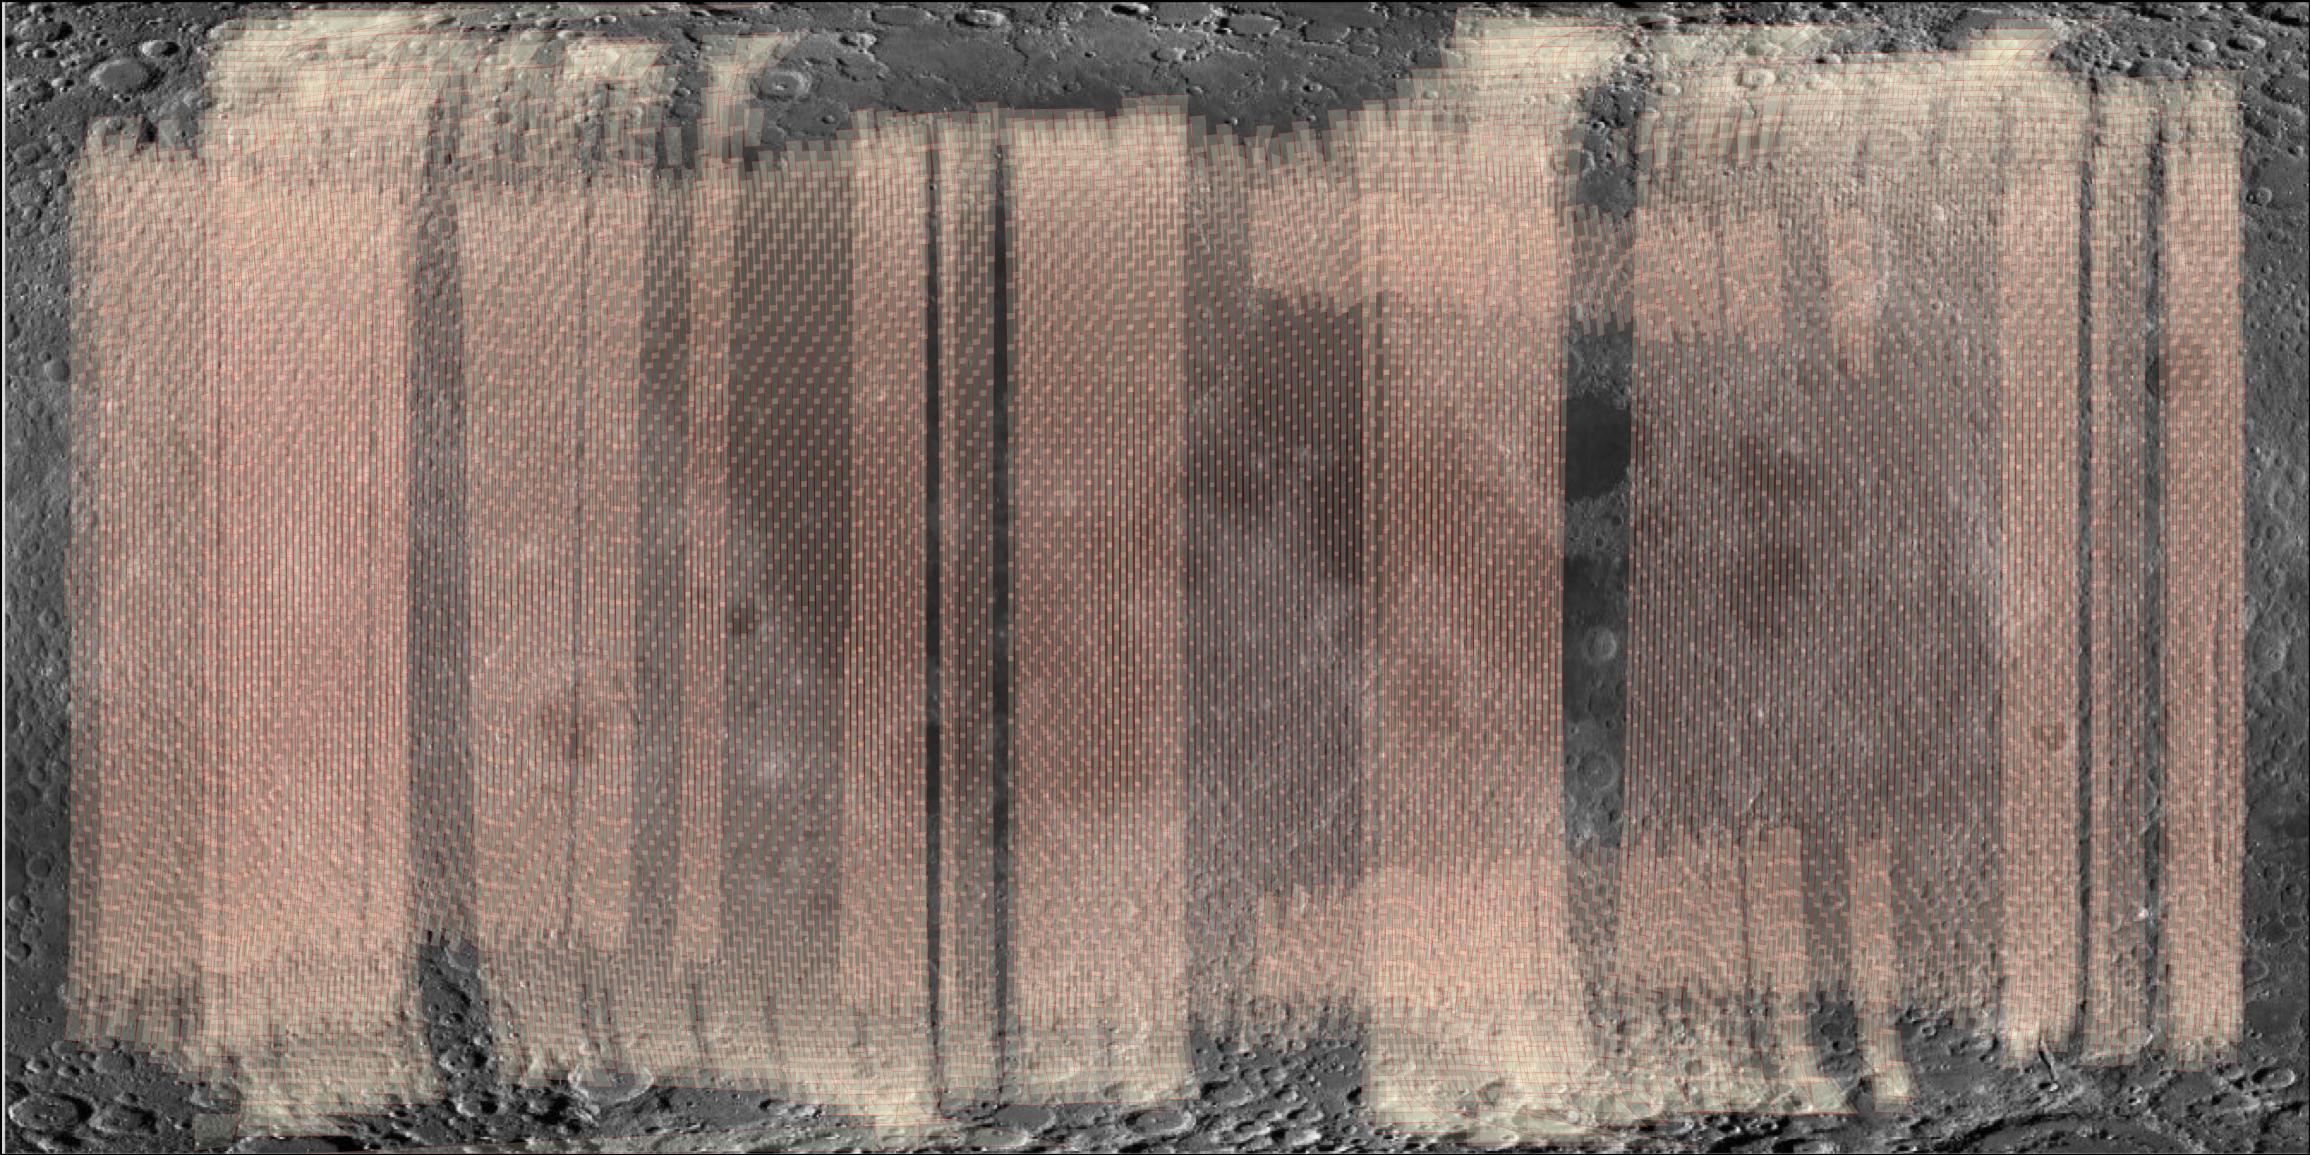

In [7]:
Image.open('/kaggle/working/moon_with_rectangles_geographic.jpg')